In [92]:
import pandas as pd
# pip install pyarrow
import numpy as np, os, matplotlib.pyplot as plt

Set working dir to repo root.

In [40]:
# set working dir to repo directory
head, tail = os.path.split(os.getcwd())
while tail != 'aj_python_tool_lib':
    head, tail = os.path.split(head)
os.chdir(os.path.join(head, tail))
#os.getcwd()

### Create a df from most popular english words
#### Read txt files add extra parameters: word length and word value

In [45]:
path_txt = os.path.join('data_processing','media','popular_words.txt')
words = []
with open(path_txt, "r") as f:
    for line in f:
        words.append(str(next(f))[:-1])
char_values = {c:i for i,c in enumerate(map(chr, range(97, 123)))}
word = words[0]

def char_count(word):
    return len(list(word))

def word_value(word):
    chars = list(word)
    return sum([char_values[c] for c in chars])

print(word, char_count(word), word_value(word))

aardvark 8 68


#### Transform data to pandas dataframe
Set index column not as numbers but as words themselves

In [217]:

data = np.array([   
                    list(map(char_count,words)),
                    list(map(word_value,words))], 

                dtype=object).T

df = pd.DataFrame(data, index=words, columns=['Char_count','Value'])

df = df.rename_axis('Word', axis='index')
df.head()

,Char_count,Value
Word,,
aardvark,8,68
aback,5,13
abandon,7,44
abandoning,10,71
abandons,8,62


#### Get information about df

In [218]:
df.info()
print('\ndf shape:',df.shape)

num_entries = df.shape[0]

print('\ncolumns:', df.columns)

<class 'pandas.core.frame.DataFrame'>
Index: 12661 entries, aardvark to zooming
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Char_count  12661 non-null  object
 1   Value       12661 non-null  object
dtypes: object(2)
memory usage: 296.7+ KB

df shape: (12661, 2)

columns: Index(['Char_count', 'Value'], dtype='object')


## Display elements:


In [249]:
np.random.seed(69)
select_idx = np.random.randint(0,num_entries+1, size = (3,))
print(select_idx)
subdf_words = df.index[select_idx].tolist()
subdf_words

[ 7371  4041 10859]


['negatives', 'eyesore', 'stubble']

### Entries via indicies of columns
similar to dictionary, numpy

### Alternatively via indicies and __.iloc()__ and/or sinlge call __.iat()__ methods
#### __*iloc*__ for accesing many entries, __*iat*__ for fast access to single entry
Can do same by supplying a boolean mask.

Notice that by calling 0-th column as [0], you get a slice of dataframe with preserved structure.

In [250]:
column_idx = 0
print('column by idx:', df.columns[column_idx])
select_words2 = df.iloc[select_idx,column_idx]
display(select_words2)
print(select_words2.tolist())

select_words3 = df.iloc[select_idx,[column_idx]]
display(select_words3)
print(select_words3.to_numpy().flatten().tolist())    # or .values.flatten().tolist()

column by idx: Char_count


Word
negatives    9
eyesore      7
stubble      7
Name: Char_count, dtype: object

[9, 7, 7]


,Char_count
Word,
negatives,9
eyesore,7
stubble,7


[9, 7, 7]


### entries via names

In [271]:
display(df.loc[subdf_words] )

idx_name = subdf_words[0]
col_name = df.columns[0]
entry = df.at[idx_name,col_name]

print('word:\t\t',idx_name,'\ncol_name:\t',col_name, '\nvalue:\t\t', entry)


,Char_count,Value
Word,,
negatives,9,93
eyesore,7,85
stubble,7,74


word:		 negatives 
col_name:	 Char_count 
value:		 9


### Selections can be done via masks:
Masks can be combined using boolean arithmetic. Notice brackets around (X > Y). 

If result is too big, you can show only a limited sample

In [302]:
df.loc[(df['Char_count'] > 12) & (df['Char_count'] < 16) & (df['Value'] >= 130)].sample(10)

,Char_count,Value
Word,,
international,13,139
laughingstock,13,134
transvestites,13,178
significantly,13,135
psychoanalysis,14,172
psychologists,13,174
specifications,14,134
congratulations,15,174
malfunctioning,14,144


### DataFrame analysis functions
Variety of mathematical functions can be applied to dataframe entries.

You can check overview of a column, but integer data types prevent mathematical operations that result in floats, so those wont show in results.

Unless you convert dataframe to floats

In [295]:
print('max by value:', df['Value'].max())
display(df['Value'].convert_dtypes().describe()) # original df is not converted, only slice
df['Value'].value_counts()


max by value: 229


count      12661.0
mean      78.17471
std      30.304254
min            1.0
25%           56.0
50%           75.0
75%           97.0
max          229.0
Name: Value, dtype: Float64

Value
70     194
69     184
76     180
67     179
72     178
      ... 
2        1
190      1
7        1
215      1
229      1
Name: count, Length: 199, dtype: int64

### Different operations on dataframes result in other dataframes, so similar operations can be applied to them also

mean count =  78.17470973856726


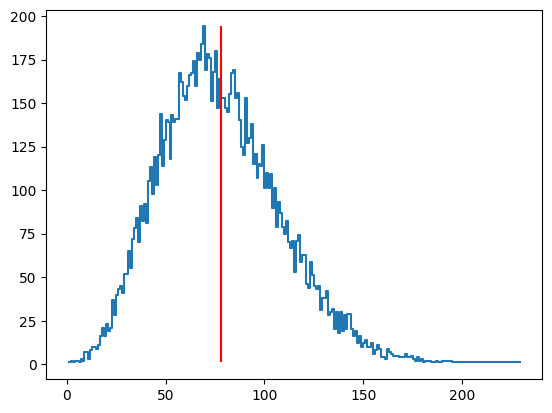

In [342]:
vc_df = df['Value'].value_counts()
sorted_vc_df = vc_df.sort_index()
mean = np.average(vc_df.index, weights=vc_df.to_numpy())
print('mean count = ', mean)
plt.step(sorted_vc_df.index, sorted_vc_df.values)
plt.vlines(mean, ymin = sorted_vc_df.min(), ymax = sorted_vc_df.max(), colors= 'r')